# Regression 03 

# A. Shrinkage (regularization) methods 

bias + variança
# B. Orthogonalization methods

agafar els predictors i reemplaçar-los per una coleccio de comb lineals, per a que els nous predictors siguin ortogonals entre ells (combinacions lineals)

## Josep Fortiana 2020-10-22

Both families of methods are applicable when there are many predictors, possibly multicollinear. 

Shrinkage, or regularization, methods replace the ordinary least squares condition with penalized least squares, where the penalty term purpose is to diminish the regression coefficients variance (dispersion, unstability). This is the shrinkage in the name.

Orthogonalization methods replace the set of observed predictor variables with a new set of orthogonal variables, derived as linear combinations of the old ones in such a way that the _prediction space,_ that is, the space of columns of $X$, the regression matrix is conserved.

In this laboratory we see two shrinkage methods: Ridge regression and the Lasso, and two orthogonalization methods, Principal Components Regression (PCR) and Partial Least Squares (PLS).

# A1. Ridge regression

##  1. Longley dataset and the `lm.ridge` function in the `MASS`  package

## Longley's Economic Regression Data

### Description

A macroeconomic data set which provides a well-known example for a highly collinear regression.

### Format

A data frame with 7 economical variables, observed yearly from 1947 to 1962 (n=16).

01. `GNP.deflator`: GNP implicit price deflator (1954=100)
02. `GNP`:          Gross National Product.
03. `Unemployed`:   number of unemployed.
04. `Armed.Forces`: number of people in the armed forces.
05. `Population`:   noninstitutionalized population ≥ 14 years of age.
06. `Year`:         the year (time).
07. `Employed`:     number of people employed.

The regression `lm(Employed ~ .)` is known to be highly collinear.

### Source

J. W. Longley (1967) _An appraisal of least-squares programs from the point of view of the user._
Journal of the American Statistical Association 62, 819–841.

### References

Becker, R. A., Chambers, J. M. and Wilks, A. R. (1988) _The New S Language._ Wadsworth & Brooks/Cole

In [1]:
require(MASS)
data(longley)
str(longley)

Loading required package: MASS



'data.frame':	16 obs. of  7 variables:
 $ GNP.deflator: num  83 88.5 88.2 89.5 96.2 ...
 $ GNP         : num  234 259 258 285 329 ...
 $ Unemployed  : num  236 232 368 335 210 ...
 $ Armed.Forces: num  159 146 162 165 310 ...
 $ Population  : num  108 109 110 111 112 ...
 $ Year        : int  1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 ...
 $ Employed    : num  60.3 61.1 60.2 61.2 63.2 ...


In [2]:
longley.ridge.1<-lm.ridge(Employed ~ .,data=longley)
str(longley.ridge.1)

List of 9
 $ coef  : Named num [1:6] 0.157 -3.447 -1.828 -0.696 -0.344 ...
  ..- attr(*, "names")= chr [1:6] "GNP.deflator" "GNP" "Unemployed" "Armed.Forces" ...
 $ scales: Named num [1:6] 10.45 96.24 90.48 67.38 6.74 ...
  ..- attr(*, "names")= chr [1:6] "GNP.deflator" "GNP" "Unemployed" "Armed.Forces" ...
 $ Inter : int 1
 $ lambda: num 0
 $ ym    : num 65.3
 $ xm    : Named num [1:6] 102 388 319 261 117 ...
  ..- attr(*, "names")= chr [1:6] "GNP.deflator" "GNP" "Unemployed" "Armed.Forces" ...
 $ GCV   : Named num 0.00836
  ..- attr(*, "names")= chr "0"
 $ kHKB  : num 0.00428
 $ kLW   : num 0.0323
 - attr(*, "class")= chr "ridgelm"


In [3]:
coefficients(longley.ridge.1) #coefs de la regressió

GNP.deflator           GNP    Unemployed  Armed.Forces 
-3.482259e+03  1.506187e-02 -3.581918e-02 -2.020230e-02 -1.033227e-02 
   Population          Year 
-5.110411e-02  1.829151e+00

In [4]:
longley.ridge.1$scales #lm.ridge, les variables predictores les escala de manera que tinguin mean = 0 variança =1

GNP.deflator          GNP   Unemployed Armed.Forces   Population         Year 
   10.448877    96.238735    90.479112    67.382126     6.735216     4.609772

In [5]:
print(longley.ridge.1)

               GNP.deflator           GNP    Unemployed  Armed.Forces 
-3.482259e+03  1.506187e-02 -3.581918e-02 -2.020230e-02 -1.033227e-02 
   Population          Year 
-5.110411e-02  1.829151e+00 


In [6]:
summary(longley.ridge.1)

       Length Class  Mode   
coef   6      -none- numeric
scales 6      -none- numeric
Inter  1      -none- numeric
lambda 1      -none- numeric
ym     1      -none- numeric
xm     6      -none- numeric
GCV    1      -none- numeric
kHKB   1      -none- numeric
kLW    1      -none- numeric

$y$ $X$

$$
\hat{\beta}=(X'\cdot X)^{-1}\cdot X'\cdot y
$$

La regressió ridge: recordeu que quan tenieu una reg amb resposta Y i matriu de regressió X.
Calculavem els coefs de la regressió fent el prod de la matriu transposada multiplicada per X, la inversa  i aixo multiplicat per X transposada i per  y
Problema: multicolineitat: aquesta matriu que invertim, era det=0 o bé det!=0 però numericament era inestable al fer la inversa.

La idea ridge es reemplaçar aquest estimador per un nou estimador construit:

$$
\hat{\beta}_{\lambda}=(X'\cdot X+\lambda I)^{-1}\cdot X'\cdot y
$$

Multipliquem per Ilambda

a base d'anar augmentant el param lambda, tindre la inversa en bones condicions
El resultat d'aixo es el betalambda te biax. Però la inversa és numericament estable i menys desviació.

Lambda correcte: hi han metodes per triar el param de regula lambda

### Numerical methods to find an optimal regularization parameter

`kHKB` is an estimate of the optimal $\lambda$, proposed by Hoerl, Kennard and Baldwin (1975). 

`kLW` is another estimate, proposed by Lawless, Wang (1976). 

`GCV` is the Generalized Cross-Validation statistic evaluated for each of the $\lambda$ values being tested.

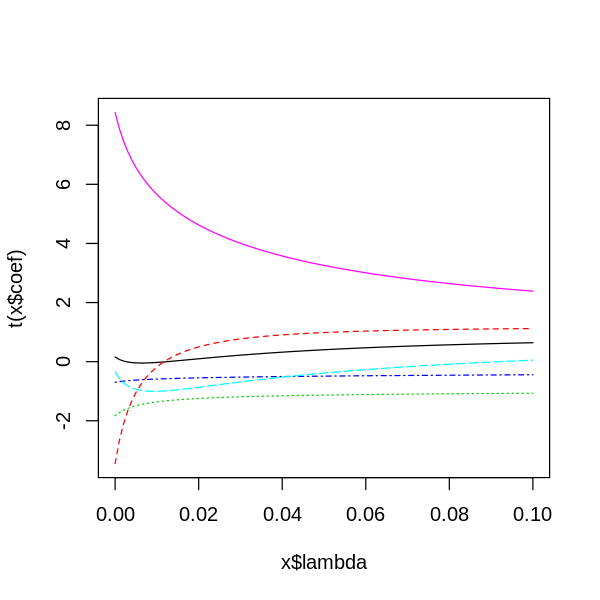

In [7]:
longley.ridge<-lm.ridge(Employed ~ .,data=longley,lambda=seq(0,0.1,by=0.001))
options(repr.plot.width=5, repr.plot.height=5)
plot(longley.ridge)

In [8]:
select(longley.ridge)

modified HKB estimator is 0.004275357 
modified L-W estimator is 0.03229531 
smallest value of GCV  at 0.003 


The `broom` package has functions to gather and visualize the output of `lm.ridge` 

In [ ]:
#install.packages("broom",dependencies=TRUE,repos="https://cloud.r-project.org")
require(broom)

Installing package into ‘/home/pau/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Warning message:
“dependency ‘btergm’ is not available”
also installing the dependencies ‘SQUAREM’, ‘lava’, ‘sys’, ‘processx’, ‘forcats’, ‘hms’, ‘readr’, ‘cellranger’, ‘progress’, ‘prodlim’, ‘askpass’, ‘colorspace’, ‘listenv’, ‘callr’, ‘gmp’, ‘polynom’, ‘sets’, ‘gbRd’, ‘rbibutils’, ‘haven’, ‘curl’, ‘readxl’, ‘openxlsx’, ‘gower’, ‘ipred’, ‘lubridate’, ‘timeDate’, ‘lazyeval’, ‘mime’, ‘openssl’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘rstudioapi’, ‘rngWELL’, ‘tmvnsim’, ‘miscTools’, ‘pcaPP’, ‘future’, ‘globals’, ‘warp’, ‘raster’, ‘classInt’, ‘units’, ‘gdata’, ‘desc’, ‘pkgbuild’, ‘rprojroot’, ‘xts’, ‘TTR’, ‘magrittr’, ‘R6’, ‘tidyselect’, ‘stringi’, ‘Formula’, ‘numDeriv’, ‘bdsmatrix’, ‘mvtnorm’, ‘flexmix’, ‘modeltools’, ‘DBI’, ‘partitions’, ‘Rdpack’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘rio’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘resha

In [10]:
# tidy(longley.ridge) 
# long output

In [11]:
glance(longley.ridge)

ERROR: Error in glance(longley.ridge): could not find function "glance"


## 2. Acetylene dataset and the  `genridge`  package

The `genridge` package includes the `Acetylene` dataset, with new variable names. We recover the linear model we tried above on these data and then we try a second linear model with quadratic terms. As a matter of fact this dataset originates from the paper: Marquardt, Donald W. and Snee, Ronald D. (1975), _"Ridge Regression in Practice",_ The American Statistician, Vol. 29, No. 1, pp. 3-20. In this paper the authors start with the model with all six quadratic terms:

$$
 \text{temp}^2,\mskip10mu \text{ratio}^2,\mskip10mu \text{time}^2,\mskip10mu \text{temp}\cdot\text{ratio},\mskip10mu \text{temp}\cdot\text{time},\mskip10mu\text{ratio}\cdot \text{time}.
$$

In [10]:
#install.packages("genridge",dependencies=TRUE,repos="https://cloud.r-project.org")
#install.packages("car",dependencies=TRUE,repos="https://cloud.r-project.org")
require(genridge)
require(car)

Loading required package: genridge

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘genridge’”
Loading required package: car

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘car’”


## Acetylene Data

### Description

The data consist of measures of yield of a chemical manufacturing process for acetylene in relation to numeric parameters.

Marquardt and Snee (1975) used these data to illustrate ridge regression in a model containing quadratic and interaction terms, 
particularly the need to center and standardize variables appearing in high-order terms.

### Usage

`data(Acetylene)`

### Format

A data frame with 16 observations on the following 4 variables.

01. `yield`: conversion percentage yield of acetylene
02. `temp`:  reactor temperature (celsius)
03. `ratio`: H2 to N-heptone ratio
04. `time`:  contact time (sec)

### Details

Typical models for these data include the interaction of temp:ratio, and a squared term in temp

### Source

SAS documentation example for PROC REG, Ridge Regression for Acetylene Data.

### References

Marquardt, D.W., and Snee, R.D. (1975), _"Ridge Regression in Practice",_ The American Statistician, 29, 3-20.

Marquardt, D.W. (1980), _"A Critique of Some Ridge Regression Methods: Comment",_ 
Journal of the American Statistical Association, Vol. 75, No. 369 (Mar., 1980), pp. 87-91

In [11]:
Acetylene<-read.table("Acetylene.txt",header=TRUE)
data(Acetylene)
str(Acetylene)

Warning message in data(Acetylene):
“data set ‘Acetylene’ not found”


'data.frame':	16 obs. of  4 variables:
 $ temp : int  1300 1300 1300 1300 1300 1300 1200 1200 1200 1200 ...
 $ ratio: num  7.5 9 11 13.5 17 23 5.3 7.5 11 13.5 ...
 $ time : num  0.012 0.012 0.0115 0.013 0.0135 0.012 0.04 0.038 0.032 0.026 ...
 $ yield: num  49 50.2 50.5 48.5 47.5 44.5 28 31.5 34.5 35 ...


#### Model with only linear terms (main effects)

In [12]:
Acetylene.lm1<-lm(yield~temp+ratio+time,data=Acetylene)
summary(Acetylene.lm1)


Call:
lm(formula = yield ~ temp + ratio + time, data = Acetylene)

Residuals:
   Min     1Q Median     3Q    Max 
-6.920 -1.856  0.234  2.074  6.948 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -121.26962   55.43571  -2.188   0.0492 *
temp           0.12685    0.04218   3.007   0.0109 *
ratio          0.34816    0.17702   1.967   0.0728 .
time         -19.02170  107.92824  -0.176   0.8630  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.767 on 12 degrees of freedom
Multiple R-squared:  0.9198,	Adjusted R-squared:  0.8998 
F-statistic: 45.88 on 3 and 12 DF,  p-value: 7.522e-07


In [13]:

vif(Acetylene.lm1)
X.Acetylene.lm1<-model.matrix(Acetylene.lm1)
kappa(X.Acetylene.lm1)

ERROR: Error in vif(Acetylene.lm1): could not find function "vif"


#### Model from the original paper by Marquardt and Snee

In [14]:
Acetylene.lm2 <- lm(yield ~ temp + ratio + time + I(temp^2)+ I(ratio^2)+ I(time^2) 
                    + temp:ratio+temp:time+ratio:time, data=Acetylene)
summary(Acetylene.lm2)


Call:
lm(formula = yield ~ temp + ratio + time + I(temp^2) + I(ratio^2) + 
    I(time^2) + temp:ratio + temp:time + ratio:time, data = Acetylene)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3499 -0.3411  0.1297  0.5011  0.6720 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -3.617e+03  3.136e+03  -1.153  0.29260   
temp         5.324e+00  4.879e+00   1.091  0.31706   
ratio        1.924e+01  4.303e+00   4.472  0.00423 **
time         1.377e+04  1.045e+04   1.318  0.23572   
I(temp^2)   -1.927e-03  1.896e-03  -1.016  0.34874   
I(ratio^2)  -3.034e-02  1.168e-02  -2.597  0.04084 * 
I(time^2)   -1.158e+04  7.699e+03  -1.504  0.18318   
temp:ratio  -1.414e-02  3.212e-03  -4.404  0.00455 **
temp:time   -1.058e+01  8.241e+00  -1.283  0.24666   
ratio:time  -2.103e+01  9.241e+00  -2.276  0.06312 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9014 on 6 degrees of freedom
Multiple R-squared:  0.997

In [15]:
round(vif(Acetylene.lm2),1)
X.Acetylene.lm2<-model.matrix(Acetylene.lm2)
round(kappa(X.Acetylene.lm2),1)

ERROR: Error in vif(Acetylene.lm2): could not find function "vif"


In [ ]:
# A third model, with fewer quadratic terms, used by Michael Friendly to illustrate genridge
Acetylene.lm3 <- lm(yield ~ temp + ratio + time + I(time^2) + temp:time, data=Acetylene)
summary(Acetylene.lm3)

In [ ]:
vif(Acetylene.lm3)
X.Acetylene.lm3<-model.matrix(Acetylene.lm3)
kappa(X.Acetylene.lm3)

#### Ridge regression with the `ridge` function from `genridge`

In [1]:
#cal que separem xs i ys
y<- Acetylene[,"yield"]
X0<-X.Acetylene.lm3[,-1]
lambda <- c(0, 0.0005, 0.001, 0.002, 0.005, 0.01)
#intervals de lambda: valors que variin logaritmicament
Acetylene.ridge.1 <- ridge(y, X0, lambda=lambda)
summary(Acetylene.ridge.1)

ERROR: Error in eval(expr, envir, enclos): object 'Acetylene' not found


#### Graphic method to find a good regularization parameter

In [2]:
traceplot(Acetylene.ridge.1)
#quan lambda es fa gran els coef tendeixen cap a 0 pq a la formula anterior xtrans*x passa a set petit comparada amb lambda

ERROR: Error in traceplot(Acetylene.ridge.1): could not find function "traceplot"


### OLS

$$
\hat{\beta}=(X'\cdot X)^{-1}\cdot X'\cdot y
$$

Hat matrix

$$
    H=X\cdot (X'\cdot X)^{-1}\cdot X'
$$

$$
    H\cdot y =\hat{y}
$$

$$
    \operatorname{tr}(H)=\text{Un enter}=\dim (<X>)=\text{df}.
$$


en la reg ordinaria hi havia la hat matrix, que era aquest producte de matrius. I la hat matrix tenia la prop de ser el prjector ortogonal sorbe el subespai generat per les X(posa el barret a la y)


La traça de la hatmatrix es un enter i coincideix ambla dimensió x, graus llib: dimensio on estem projectant.

### Ridge

$$
\hat{\beta}_{\lambda}=(X'\cdot X+\lambda I)^{-1}\cdot X'\cdot y
$$

$$
    H_{\lambda}=X\cdot (X'\cdot X+\lambda I)^{-1}\cdot X'
$$

$$
    H_{\lambda}\cdot y =\hat{y}
$$

$$
    \operatorname{tr}(H_{\lambda})=\text{Un real positiu}=\text{df}.
$$

Ridge és una cresta d'una muntanya en angles.

La hat matrix tb existeix, a la hat matrix de la regressió ridge = matriu que estem invertint i també fa la mateixa missió que la hat matrix de la regressió ordinaria.

Aquesta HM ja no es un enter, és un real. I ja no es la dimensio de la X, però li seguim donant el nom de nombre de graus de llibertat.



In [ ]:
traceplot(Acetylene.ridge.1, X="df")
#graus de llibertat
#com mes gran lambda mes petit el numde graus de llibertat

In [ ]:
pairs(Acetylene.ridge.1, radius=0.2)

## 3. The Fearn dataset

A dataset from the paper by Fearn, T. (1983), _A Misuse of Ridge Regression in the Calibration of a Near Infrared Reflectance Instrument,_ Journal of the Royal Statistical Society. Series C (Applied Statistics), Vol. 32, No. 1(1983), pp. 73-79. This paper, with intended controversial title and contents, found its rebuttal in the paper by Hoerl, Arthur E., Kennard, Robert W.  and Hoerl, Roger W. (1985), _Practical Use of Ridge Regression: A Challenge Met,_ Journal of the Royal Statistical Society. Series C (Applied Statistics), Vol. 34, No. 2(1985), pp. 114-120.

The data are the results of an experiment performed to calibrate a near infrared (NIR) reflectance instrument for the measurement of protein content in ground wheat samples. 

The protein content measurements `y` were made by the standard Kjeldahl method, and the six values `x1` - `x6` are measurements of the reflectance of NIR radiation by the wheat samples at six different wavelengths in the range 1680-2310 nm. These measurements are made on a $\log (1/R)$ scale, where $R$ is the reflectance, and are commonly referred to as _"log values"._ 

The aim of the calibration is to find a linear combination of the log values which predicts protein content

In [ ]:
Fearn.1<-read.table("Fearn.data.1.txt", header=TRUE)
Fearn.2<-read.table("Fearn.data.2.txt", header=TRUE)
str(Fearn.1)
str(Fearn.2)

Adjust the regression `y~x1+x2+x3+x4+x5+x6` with the Fearn dataset and:

1. Ordinary Least Squares (OLS), selecting the best predictors subset

2. Ridge regression

Compare prediction errors. Which one is better?

3. After working through the following section on the lasso, repeat with this method.

NOTE: the data frames `Fearn.1` and `Fearn.2` were used as train and test subsets in the original paper. You may choose to follow this selection or merge both subsets and partition the joint dataset in some other way.

## 4. The `Hitters` dataset in the `ISLR` package 

### Ridge regression following ISLR - Chap 6 - Laboratory 2 - Using the `glmnet` package

[Code from the ISLR website](http://www-bcf.usc.edu/~gareth/ISL/Chapter%206%20Labs.txt)

## Baseball Data

### Description

Major League Baseball Data from the 1986 and 1987 seasons.

### Usage

`data(Hitters)`

### Format

A data frame with 322 observations of major league players on the following 20 variables.

01. `AtBat`:      Number of times at bat in 1986
02. `Hits`:       Number of hits in 1986
03. `HmRun`:      Number of home runs in 1986
04. `Runs`        Number of runs in 1986
05. `RBI`:        Number of runs batted in in 1986
06. `Walks`:      Number of walks in 1986
07. `Years`:      Number of years in the major leagues
08. `CAtBat`:     Number of times at bat during his career
09. `CHits`:      Number of hits during his career
10. `CHmRun`:     Number of home runs during his career
11. `CRuns`:      Number of runs during his career
12. `CRBI`:       Number of runs batted in during his career
13. `CWalks`:     Number of walks during his career
14. `League`:     A factor with levels A and N indicating player's league at the end of 1986
15. `Division`:   A factor with levels E and W indicating player's division at the end of 1986
16. `PutOuts`:    Number of put outs in 1986
17. `Assists`:    Number of assists in 1986
18. `Errors`:     Number of errors in 1986
19. `Salary`:     1987 annual salary on opening day in thousands of dollars
20. `NewLeague`:  A factor with levels A and N indicating player's league at the beginning of 1987

### Source

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. 
This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. 
The salary data were originally from Sports Illustrated, April 20, 1987. 
The 1986 and career statistics were obtained from _The 1987 Baseball Encyclopedia Update_ 
published by Collier Books, Macmillan Publishing Company, New York.

### References

James, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) _An Introduction to Statistical Learning with applications in R,_
www.StatLearning.com, Springer-Verlag, New York.

In [ ]:
#install.packages("ISLR",dependencies=TRUE,repos="https://cloud.r-project.org")
require(ISLR)
#fix(Hitters)
names(Hitters)
dim(Hitters)

In [ ]:
sum(is.na(Hitters$Salary))
Hitters=na.omit(Hitters)
dim(Hitters)
sum(is.na(Hitters))

In [ ]:
# Prepare x, y for the glmnet syntax
x<-model.matrix(Salary~.,Hitters)[,-1]
y<-Hitters$Salary                        # Response variable

In [ ]:
#install.packages("glmnet",dependencies=TRUE,repos="https://cloud.r-project.org")
require(glmnet)

#### Syntax of the `glmnet()`function

`alpha=0` is for _ridge regression_

`alpha=1` is for _lasso regression_

When lambda goes to infinity penalization on coefficients beta01 through beta19 is so high 
that it pushes all of them down to zero, resulting in a model with no predictors, only the intercept term.

####  A grid of lambda values

In [ ]:
grid<-10^seq(10,-2,length=100)
ridge.mod<-glmnet(x,y,alpha=0,lambda=grid)
str(ridge.mod)

In [ ]:
dim(coef(ridge.mod))

Compare the beta regression coefficients with a large lambda (small absolute values)

In [ ]:
round(ridge.mod$lambda[50],2)
round(coef(ridge.mod)[,50],2)
round(sqrt(sum(coef(ridge.mod)[-1,50]^2)),2)

And with a smaller lambda (larger absolute values)

In [ ]:
round(ridge.mod$lambda[60],2)
round(coef(ridge.mod)[,60],2)
round(sqrt(sum(coef(ridge.mod)[-1,60]^2)),2)

We extract now the regression coefficients with the `predict` function

In [ ]:
round(predict(ridge.mod,s=50,type="coefficients")[1:20,],2)

In [ ]:
# Split randomly the dataset into 'train' and 'test' subsets
set.seed(1)
train<-sample(1:nrow(x), nrow(x)/2)
test<-(-train)
y.test<-y[test]

In [ ]:
# Adjust model with the 'train' subset
ridge.mod<-glmnet(x[train,],y[train],alpha=0,lambda=grid, thresh=1e-12)
#
# Then we evaluate prediction error (sum of squares) on the 'test' subset for three lambda values
# (lambda=4, lambda=1.0e10, lambda=0)
#
ridge.pred<-predict(ridge.mod,s=4,newx=x[test,])
round(mean((ridge.pred-y.test)^2),2)

In [ ]:
# The model with no predictors (other than the intercept) has always a predicted value equal to the mean of y
# With a large lambda, the model tends to the no predictor one
round(mean((mean(y[train])-y.test)^2),2)
ridge.pred<-predict(ridge.mod,s=1e10,newx=x[test,])
round(mean((ridge.pred-y.test)^2))

In [ ]:
# With lambda equal to zero, the ridge regression model reduces to ordinary least squares
#
## Warning
#
# predict.glmnet with 'exact' computation requires re-entering the original training dataset
#
ridge.pred<-predict(ridge.mod,x=x[train,],y=y[train],s=0,newx=x[test,],exact=TRUE)
round(mean((ridge.pred-y.test)^2),2)

In [ ]:
# Same, with no 'exact' computation
#
ridge.pred<-predict(ridge.mod,s=0,newx=x[test,])
round(mean((ridge.pred-y.test)^2),2)

In [ ]:
# Compare an ordinary least squares regression with ridge regression with lambda=0 
ols<-lm(Salary~.,data=Hitters, subset=train)
summary(ols)

In [ ]:
ols.yhat<-predict.lm(ols,newdata=Hitters[test,],type="response")
str(ols.yhat)

In [ ]:
ols.residuals<-ols.yhat-y.test
round(mean(ols.residuals^2),2)

In [ ]:
ridge.yhat<-predict(ridge.mod,x=x[train,],y=y[train],s=0,newx=x[test,],exact=TRUE)
#ridge.yhat<-predict(ridge.mod,s=0,newx=x[test,],type="response")
ridge.residuals<-ridge.yhat-y.test
round(mean(ridge.residuals^2),2)

In [ ]:
# There is a k-fold cross-validation feature in the glmnet package which we can take advantege of
# 
# By default k=10
set.seed(1)
cv.out<-cv.glmnet(x[train,],y[train],alpha=0)
plot(cv.out)

In [ ]:
bestlam<-cv.out$lambda.min
round(bestlam,3)
round(log(bestlam),3)
plot(cv.out)
abline(v=log(bestlam),lwd=3,col="cyan")

In [ ]:
# Mean quadratic error with the optimal lambda and the full dataset
# 
# Coefficients of this model
#
# We observe that none of these coefficients is zero, hence there is no variable selectioin in ridge regression. 
# To be compared with the lasso below.
ridge.pred<-predict(ridge.mod,s=bestlam,newx=x[test,])
round(mean((ridge.pred-y.test)^2),3)
out<-glmnet(x,y,alpha=0)
round(predict(out,type="coefficients",s=bestlam)[1:20,],3)

# A2. Regression with the _Lasso_ 

#### Same `Hitters` dataset as above and `glmnet` with `alpha=1`

In [ ]:
lasso.mod<-glmnet(x[train,],y[train],alpha=1,lambda=grid)
plot(lasso.mod)

In [ ]:
set.seed(1)
cv.out<-cv.glmnet(x[train,],y[train],alpha=1)
bestlam<-cv.out$lambda.min

In [ ]:
options(repr.plot.width=6, repr.plot.height=6)
plot(cv.out)

In [ ]:
round(bestlam,3)
round(log(bestlam),3)

In [ ]:
plot(cv.out)
abline(v=log(bestlam),lwd=3,col="cyan")

In [ ]:
# Quadratic error on the test subset with the optimal lambda 
lasso.pred<-predict(lasso.mod,s=bestlam,newx=x[test,])
round(mean((lasso.pred-y.test)^2),3)

## Variable selection feature of the _Lasso_

In [ ]:
# Quadratic error on the full dataset with the optimal lambda
# Coefficients in this model:
#
# Now we see there are zero coefficients: this is equivalent to discarding these variables.
#
# Compare with the ridge regression above
#
out<-glmnet(x,y,alpha=1,lambda=grid)
lasso.coef<-predict(out,type="coefficients",s=bestlam)[1:20,]
round(lasso.coef,3)
round(lasso.coef[lasso.coef!=0],3)

# B. Orthogonalization methods

## Following  ISLR - Cap 6 - Laboratory 3 - PCR and PLS 

[Code from the ISLR website](http://www-bcf.usc.edu/~gareth/ISL/Chapter%206%20Labs.txt)

In [ ]:
#install.packages("pls",dependencies=TRUE,repos="https://cloud.r-project.org")
require(pls)

# B1. Principal Components Regression (PCR)

In [ ]:
# Principal Components Regression
set.seed(2)
pcr.fit<-pcr(Salary~., data=Hitters,scale=TRUE,validation="CV")
summary(pcr.fit)

In [ ]:
validationplot(pcr.fit,val.type="MSEP")

In [ ]:
# Cross-validation with hold-out
#
# Training the model, selecting number of principal components included in the model
set.seed(1)
pcr.fit<-pcr(Salary~., data=Hitters,subset=train,scale=TRUE, validation="CV")
validationplot(pcr.fit,val.type="MSEP")

In [ ]:
# The minimum of the graph (optimal number of orthogonal variables) appears at 5 variables (principal components).
# Fit the model for this number
pcr.pred<-predict(pcr.fit,x[test,],ncomp=5)
round(mean((pcr.pred-y.test)^2),3)
pcr.fit<-pcr(y~x,scale=TRUE,ncomp=5)
summary(pcr.fit)

# B2. Partial Least Squares (PLS)

In [ ]:
# Partial Least Squares
set.seed(1)
pls.fit<-plsr(Salary~., data=Hitters,subset=train,scale=TRUE, validation="CV")
summary(pls.fit)

In [ ]:
validationplot(pls.fit,val.type="MSEP")

In [ ]:
# The minimum of the graph (optimal number of orthogonal variables) appears at 2 variables.
# Fit the model for this number
pls.pred<-predict(pls.fit,x[test,],ncomp=2)
round(mean((pls.pred-y.test)^2),3)
pls.fit<-plsr(Salary~., data=Hitters,scale=TRUE,ncomp=2)
summary(pls.fit)